In [1]:
import numpy as np
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedGroupKFold


In [2]:
path_to_npz_files = 'C:/Users/xavis\OneDrive/Escritorio/Uni/TFG/ContrastiveHPyloriTFG/SimCLR-master/Inferences'  # Adjust this path as needed
path= "C:/Users/xavis/Downloads/PatientDiagnosis.csv"
Real_Diagnosis=pd.read_csv(path)

In [3]:
train_dataset = pd.read_excel('C:/Users/xavis/OneDrive/Escritorio/Uni/TFG/ContrastiveHPyloriTFG/HPyloriData/HP_WSI-CoordAnnotatedWindows.xlsx')
train_dataset_aug = pd.read_excel('C:/Users/xavis/OneDrive/Escritorio/Uni/TFG/ContrastiveHPyloriTFG/HPyloriData/HP_WSI-CoordAugAnnotatedWindows.xlsx')
print(train_dataset)
print(train_dataset_aug)
train_dataset = train_dataset[train_dataset['Deleted']==0][train_dataset['Cropped']==0][train_dataset['Presence']!=0]
aug=True
if aug:
    train_dataset = train_dataset.drop(columns=['Deleted', 'Cropped'])
    train_dataset_aug = train_dataset_aug.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

    train_dataset = pd.concat([train_dataset, train_dataset_aug], ignore_index=True)

    def add_leading_zeros(value):

        try:
            num_part, text_part = value.split('_')
            num_part = num_part.zfill(5)  # Pad the numeric part with leading zeros up to 5 digits
            return f"{num_part}_{text_part}"
        except:
            return str(value).zfill(5) 
    train_dataset['Window_ID'] = train_dataset['Window_ID'].apply(add_leading_zeros)
    
train_dataset = train_dataset.reset_index()
# gss = GroupShuffleSplit(n_splits=1, test_size=0.2,random_state=202)
strkf = StratifiedGroupKFold(n_splits=15)
splits = strkf.split(X=train_dataset, y=train_dataset['Presence'], groups=train_dataset['Pat_ID'])

       Pat_ID  WSI_ID  Window_ID      i      j    h    w  Presence  Cropped  \
0     B22-129       0        659   7477  11978  256  256        -1        0   
1      B22-68       0        131   6597  12009  256  256        -1        0   
2      B22-68       0        141   5100  10737  256  256        -1        0   
3      B22-68       0        290   5015  14908  256  256        -1        0   
4      B22-68       0        298  11626  13928  256  256        -1        0   
...       ...     ...        ...    ...    ...  ...  ...       ...      ...   
2630  B22-150       1        517   5476   3501  256  256         0        0   
2631  B22-150       1        297  10571  13216  256  256         0        0   
2632  B22-150       1        102  11599  10384  256  256         0        0   
2633  B22-150       1        341  15036   8492  256  256         0        0   
2634  B22-150       1        184  16691   8893  256  256         0        0   

      Deleted  
0           0  
1           0  
2  

C:\Users\xavis\AppData\Local\Temp\ipykernel_21068\2621329094.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_dataset = train_dataset[train_dataset['Deleted']==0][train_dataset['Cropped']==0][train_dataset['Presence']!=0]
C:\Users\xavis\AppData\Local\Temp\ipykernel_21068\2621329094.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_dataset = train_dataset[train_dataset['Deleted']==0][train_dataset['Cropped']==0][train_dataset['Presence']!=0]


In [18]:
print(train_dataset['Pat_ID'].nunique())

123


In [4]:
llista_train=[]
llista_test=[]

In [5]:
for train_idx, test_idx in splits:
    llista_train.append(train_dataset.iloc[train_idx]['Pat_ID'].unique())
    llista_test.append(train_dataset.iloc[test_idx]['Pat_ID'].unique())

In [6]:
for element in llista_train:
    print(element.shape)

(118,)
(115,)
(115,)
(114,)
(122,)
(114,)
(120,)
(112,)
(118,)
(114,)
(114,)
(112,)
(112,)
(111,)
(111,)


In [7]:
for element in llista_test:
    print(element.shape)

(5,)
(8,)
(8,)
(9,)
(1,)
(9,)
(3,)
(11,)
(5,)
(9,)
(9,)
(11,)
(11,)
(12,)
(12,)


In [8]:
Real_Diagnosis['DENSITAT']=Real_Diagnosis['DENSITAT']!='NEGATIVA'
Real_Diagnosis['DENSITAT']=Real_Diagnosis['DENSITAT'].astype('int64')

In [9]:
llista=os.listdir(path_to_npz_files)

In [10]:
llista

['Inference_BCE_1',
 'Inference_BCE_10',
 'Inference_BCE_11',
 'Inference_BCE_12',
 'Inference_BCE_13',
 'Inference_BCE_14',
 'Inference_BCE_15',
 'Inference_BCE_2',
 'Inference_BCE_3',
 'Inference_BCE_4',
 'Inference_BCE_5',
 'Inference_BCE_6',
 'Inference_BCE_7',
 'Inference_BCE_8',
 'Inference_BCE_9',
 'Inference_Triplet_1',
 'Inference_Triplet_10',
 'Inference_Triplet_11',
 'Inference_Triplet_12',
 'Inference_Triplet_13',
 'Inference_Triplet_14',
 'Inference_Triplet_15',
 'Inference_Triplet_2',
 'Inference_Triplet_3',
 'Inference_Triplet_4',
 'Inference_Triplet_5',
 'Inference_Triplet_6',
 'Inference_Triplet_7',
 'Inference_Triplet_8',
 'Inference_Triplet_9',
 'Inference_Xent_1',
 'Inference_Xent_10',
 'Inference_Xent_11',
 'Inference_Xent_12',
 'Inference_Xent_13',
 'Inference_Xent_14',
 'Inference_Xent_15',
 'Inference_Xent_2',
 'Inference_Xent_3',
 'Inference_Xent_4',
 'Inference_Xent_5',
 'Inference_Xent_6',
 'Inference_Xent_7',
 'Inference_Xent_8',
 'Inference_Xent_9']

In [11]:
llista=['Inference_Xent_1',
 'Inference_Xent_10',
 'Inference_Xent_11',
 'Inference_Xent_12',
 'Inference_Xent_13',
 'Inference_Xent_14',
 'Inference_Xent_15',
 'Inference_Xent_2',
 'Inference_Xent_3',
 'Inference_Xent_4',
 'Inference_Xent_5',
 'Inference_Xent_6',
 'Inference_Xent_7',
 'Inference_Xent_8',
 'Inference_Xent_9']

In [15]:
llista=['Inference_Triplet_1',
 'Inference_Triplet_10',
 'Inference_Triplet_11',
 'Inference_Triplet_12',
 'Inference_Triplet_13',
 'Inference_Triplet_14',
 'Inference_Triplet_15',
 'Inference_Triplet_2',
 'Inference_Triplet_3',
 'Inference_Triplet_4',
 'Inference_Triplet_5',
 'Inference_Triplet_6',
 'Inference_Triplet_7',
 'Inference_Triplet_8',
 'Inference_Triplet_9']

In [19]:
llista=['Inference_BCE_1',
 'Inference_BCE_10',
 'Inference_BCE_11',
 'Inference_BCE_12',
 'Inference_BCE_13',
 'Inference_BCE_14',
 'Inference_BCE_15',
 'Inference_BCE_2',
 'Inference_BCE_3',
 'Inference_BCE_4',
 'Inference_BCE_5',
 'Inference_BCE_6',
 'Inference_BCE_7',
 'Inference_BCE_8',
 'Inference_BCE_9']

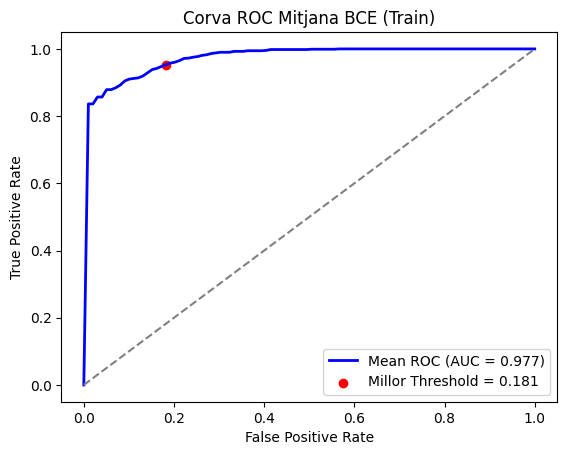

Mean AUC: 0.9771121070819109
Mean Optimal Threshold: 0.18096099758870685


In [21]:
# Example patient ID
suma=0
preds = []
real = []
misclass=[]
total=0
minim =0
maxim = 200000
mean_umbral = 0
mean_auc =0
mean_fpr = np.linspace(0, 1, 100)
tpr_list = []
index=0
llista_thrs=[]
for filename in llista:
    preds = []
    real = []
    os.chdir(path_to_npz_files)

    # Load the npz file
    npz_filepath = os.path.join(path_to_npz_files, filename)
    for file in os.listdir(npz_filepath):

        data = np.load(os.path.join(npz_filepath, file))
        probabilities = data['probabilities']
        probabilities = probabilities
        codi = file.split('_')[0]
        if codi in llista_train[index]:
                preds.append((np.mean(probabilities>0.5)))
                real.append((Real_Diagnosis[Real_Diagnosis['CODI']==codi]['DENSITAT'].values[0]))
                # print(real)
    # print(preds)
    fpr, tpr, thresholds = roc_curve(real, preds)

    auc_score = roc_auc_score(real, preds)
    tpr_list.append(np.interp(mean_fpr, fpr, tpr))
    tpr_list[-1][0] = 0.0
    # 5. Determinar el umbral óptimo

    optimal_idx = (tpr - fpr).argmax()
    optimal_threshold = thresholds[optimal_idx]
    mean_umbral+=optimal_threshold/15
    llista_thrs.append(optimal_threshold)
    mean_auc+=auc_score/15
    index+=1
mean_tpr = np.mean(tpr_list, axis=0)
mean_tpr[-1] = 1.0

plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', lw=2, label=f'Mean ROC (AUC = {mean_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.scatter(mean_fpr[int(mean_umbral * 100)], mean_tpr[int(mean_umbral * 100)], color='red', marker='o', label=f'Millor Threshold = {mean_umbral:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Corva ROC Mitjana BCE (Train)')
plt.legend(loc="lower right")
plt.show()

print(f"Mean AUC: {mean_auc}")
print(f"Mean Optimal Threshold: {mean_umbral}")

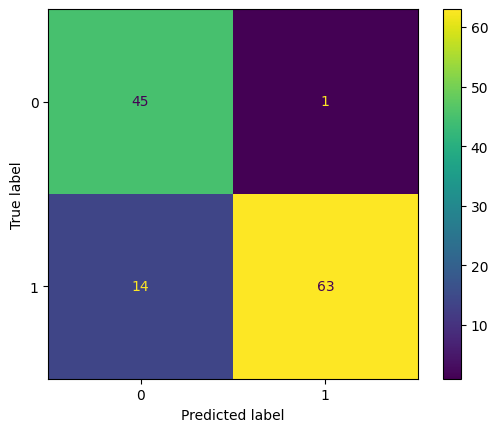

In [22]:

# Example patient ID

suma=0
preds = []
real = []
misclass=[]
total=0
minim =0
maxim = 200000
mean_fpr = np.linspace(0, 1, 100)
tpr_list = []
persona =[]
# mean_umbral = 0
# mean_preds=np.zeros(271)
index=0
for filename in llista:
#     preds = []
#     real = []
        os.chdir(path_to_npz_files)
        # Load the npz file
        npz_filepath = os.path.join(path_to_npz_files, filename)
        for file in os.listdir(npz_filepath):
        #         print(file)
                data = np.load(os.path.join(npz_filepath, file))
        #         print(data['probabilities'])
                # Extract the probabilities
                probabilities = data['probabilities']

                probabilities = probabilities
                codi = file.split('_')[0]
                if codi in llista_test[index]:
                        # print(codi)
                        persona.append(codi)
                        preds.append((np.mean(probabilities>0.5)>=llista_thrs[index]))
                        real.append((Real_Diagnosis[Real_Diagnosis['CODI']==codi]['DENSITAT'].values[0]))
        index+=1

cm = confusion_matrix(real, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [324]:
(np.array(real)-np.array(preds)).astype('bool')

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False])

In [320]:
preds

[True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True]

In [325]:
np.unique(np.array(persona)[(np.array(real)-np.array(preds)).astype('bool')])

array(['B22-117', 'B22-119', 'B22-127', 'B22-138', 'B22-142', 'B22-149',
       'B22-151', 'B22-174', 'B22-256', 'B22-270', 'B22-35', 'B22-68',
       'B22-93'], dtype='<U7')

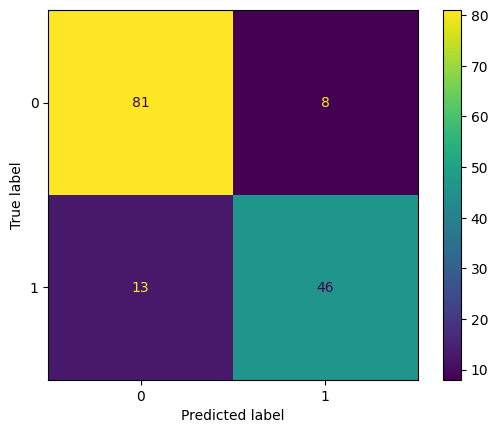

In [23]:
suma=0
preds = []
real = []
misclass=[]
total=0
minim =0
maxim = 200000
# mean_umbral = 0
mean_preds=np.zeros(271-123)
index=0
for filename in llista:
        preds = []
        real = []
        persona=[]

        os.chdir(path_to_npz_files)
        # Load the npz file
        npz_filepath = os.path.join(path_to_npz_files, filename)
        for file in os.listdir(npz_filepath):
        #         print(file)
                data = np.load(os.path.join(npz_filepath, file))
        #         print(data['probabilities'])
                # Extract the probabilities
                probabilities = data['probabilities']

                probabilities = probabilities
                codi = file.split('_')[0]
                if (codi not in llista_test[index]) and (codi not in llista_train[index]):
                        persona.append(codi)
                        preds.append((np.mean(probabilities>0.5)>np.mean(llista_thrs)))
                        real.append((Real_Diagnosis[Real_Diagnosis['CODI']==codi]['DENSITAT'].values[0]))
        index+=1
        mean_preds=mean_preds+preds


cm = confusion_matrix(real, ((mean_preds/15)>0.1).astype('int64'))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
persona=persona.unique

In [333]:
np.unique(np.array(persona)[(np.array(real)-np.array(((mean_preds/15)>0.1).astype('int64'))).astype('bool')])


array(['B22-01', 'B22-105', 'B22-139', 'B22-152', 'B22-206', 'B22-224',
       'B22-269', 'B22-271', 'B22-286', 'B22-295', 'B22-44', 'B22-49',
       'B22-58', 'B22-81', 'B22-82', 'B22-96'], dtype='<U7')

In [123]:

# Example patient ID

suma=0
preds = []
real = []
misclass=[]
total=0
minim =0
maxim = 200000
mean_umbral = 0
for filename in llista:
    preds = []
    real = []
    os.chdir(path_to_npz_files)
    # Load the npz file
    npz_filepath = os.path.join(path_to_npz_files, filename)
    for file in os.listdir(npz_filepath):
#         print(file)
        data = np.load(os.path.join(npz_filepath, file))
#         print(data['probabilities'])
        # Extract the probabilities
        probabilities = data['probabilities']
#         total+=len(probabilities)
#         if len(probabilities)>minim:
#             minim = len(probabilities)
#         if len(probabilities)<maxim:
#             maxim = len(probabilities)

        probabilities = probabilities
        codi = file.split('_')[0]
#         print(codi)
        # Print the probabilitiesC:\Users\xavis\OneDrive\Escritorio\Uni\TFG\ContrastiveHPyloriTFG\SimCLR-master\eval2.py
    #     print(f'Probabilities for patient {filename[:7]}:')
    #     print(Real_Diagnosis[Real_Diagnosis['CODI']==codi]['DENSITAT'].values[0])
    #     print(np.mean(probabilities>0.8)>0.08)
    #     print(np.mean(probabilities))
#         print(probabilities)
        preds.append((np.mean(probabilities)))
        real.append((Real_Diagnosis[Real_Diagnosis['CODI']==codi]['DENSITAT'].values[0]))
    # print(real)
    # print(preds)
    fpr, tpr, thresholds = roc_curve(real, preds)
    # print(fpr)
    # print(tpr)
    auc_score = roc_auc_score(real, preds)

    # 5. Determinar el umbral óptimo
    # Aquí, buscamos el umbral que maximiza la diferencia (tpr - fpr), que equivale a maximizar (sensibilidad + especificidad - 1)
    optimal_idx = (tpr - fpr).argmax()
    optimal_threshold = thresholds[optimal_idx]
    mean_umbral+=optimal_threshold/15
    # Mostrar resultados
    print(f'AUC: {auc_score}')
    print(f'Umbral óptimo: {optimal_threshold}')
#         print(real)
#         print(preds)
#     cm = confusion_matrix(real, preds)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot()


AUC: 0.9366830065359477
Umbral óptimo: 0.2322486937046051
AUC: 0.9497004357298475
Umbral óptimo: 0.16761645674705505
AUC: 0.9354302832244008
Umbral óptimo: 0.21801583468914032
AUC: 0.9508986928104576
Umbral óptimo: 0.15734362602233887
AUC: 0.938425925925926
Umbral óptimo: 0.21414877474308014
AUC: 0.9433278867102397
Umbral óptimo: 0.20594830811023712
AUC: 0.9156590413943355
Umbral óptimo: 0.24211063981056213
AUC: 0.9523692810457516
Umbral óptimo: 0.1755756139755249
AUC: 0.942020697167756
Umbral óptimo: 0.18699869513511658
AUC: 0.9452886710239652
Umbral óptimo: 0.16762444376945496
AUC: 0.9470860566448802
Umbral óptimo: 0.15885040163993835
AUC: 0.9522058823529412
Umbral óptimo: 0.15828010439872742
AUC: 0.942946623093682
Umbral óptimo: 0.18225941061973572
AUC: 0.9447440087145971
Umbral óptimo: 0.1605544239282608
AUC: 0.9543845315904139
Umbral óptimo: 0.16591177880764008


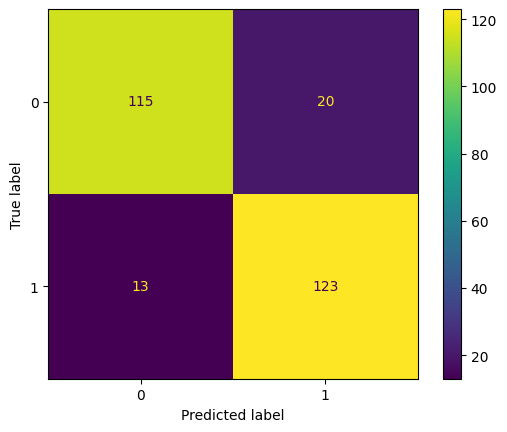

In [124]:

# Example patient ID

suma=0
preds = []
real = []
misclass=[]
total=0
minim =0
maxim = 200000
# mean_umbral = 0
mean_preds=np.zeros(271)
for filename in llista:
    preds = []
    real = []
    os.chdir(path_to_npz_files)
    # Load the npz file
    npz_filepath = os.path.join(path_to_npz_files, filename)
    for file in os.listdir(npz_filepath):
#         print(file)
        data = np.load(os.path.join(npz_filepath, file))
#         print(data['probabilities'])
        # Extract the probabilities
        probabilities = data['probabilities']
#         total+=len(probabilities)
#         if len(probabilities)>minim:
#             minim = len(probabilities)
#         if len(probabilities)<maxim:
#             maxim = len(probabilities)

        probabilities = probabilities
        codi = file.split('_')[0]
#         print(codi)
        # Print the probabilitiesC:\Users\xavis\OneDrive\Escritorio\Uni\TFG\ContrastiveHPyloriTFG\SimCLR-master\eval2.py
    #     print(f'Probabilities for patient {filename[:7]}:')
    #     print(Real_Diagnosis[Real_Diagnosis['CODI']==codi]['DENSITAT'].values[0])
    #     print(np.mean(probabilities>0.8)>0.08)
    #     print(np.mean(probabilities))
#         print(probabilities)
        preds.append((np.mean(probabilities)>mean_umbral))
        real.append((Real_Diagnosis[Real_Diagnosis['CODI']==codi]['DENSITAT'].values[0]))
    # print(real)
    # print(preds)
    mean_preds=mean_preds+preds
    # fpr, tpr, thresholds = roc_curve(real, preds)
    # # print(fpr)
    # # print(tpr)
    # auc_score = roc_auc_score(real, preds)

    # # 5. Determinar el umbral óptimo
    # # Aquí, buscamos el umbral que maximiza la diferencia (tpr - fpr), que equivale a maximizar (sensibilidad + especificidad - 1)
    # optimal_idx = (tpr - fpr).argmax()
    # optimal_threshold = thresholds[optimal_idx]
    # mean_umbral+=optimal_threshold/15
    # # Mostrar resultados
    # print(f'AUC: {auc_score}')
    # print(f'Umbral óptimo: {optimal_threshold}')
#         print(real)
#         print(preds)
#     cm = confusion_matrix(real, preds)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot()
cm = confusion_matrix(real, ((mean_preds/15)>0.2).astype('int64'))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [57]:

# Example patient ID

suma=0
preds = []
real = []
misclass=[]
total=0
minim =0
maxim = 200000
for filename in llista:
    preds = []
    real = []
    os.chdir(path_to_npz_files)
    # Load the npz file
    npz_filepath = os.path.join(path_to_npz_files, filename)
    for file in os.listdir(npz_filepath):
#         print(file)
        data = np.load(os.path.join(npz_filepath, file))
#         print(data['probabilities'])
        # Extract the probabilities
        probabilities = data['probabilities']
#         total+=len(probabilities)
#         if len(probabilities)>minim:
#             minim = len(probabilities)
#         if len(probabilities)<maxim:
#             maxim = len(probabilities)

        probabilities = probabilities[probabilities]
        codi = file.split('_')[0]
#         print(codi)
        # Print the probabilitiesC:\Users\xavis\OneDrive\Escritorio\Uni\TFG\ContrastiveHPyloriTFG\SimCLR-master\eval2.py
    #     print(f'Probabilities for patient {filename[:7]}:')
    #     print(Real_Diagnosis[Real_Diagnosis['CODI']==codi]['DENSITAT'].values[0])
    #     print(np.mean(probabilities>0.8)>0.08)
    #     print(np.mean(probabilities))
#         print(probabilities)
        preds.append((np.mean(probabilities>0.9)))
        real.append((Real_Diagnosis[Real_Diagnosis['CODI']==codi]['DENSITAT'].values[0]))
    # print(real)
    # print(preds)
    fpr, tpr, thresholds = roc_curve(real, preds)
    # print(fpr)
    # print(tpr)
    auc_score = roc_auc_score(real, preds)

    # 5. Determinar el umbral óptimo
    # Aquí, buscamos el umbral que maximiza la diferencia (tpr - fpr), que equivale a maximizar (sensibilidad + especificidad - 1)
    optimal_idx = (tpr - fpr).argmax()
    optimal_threshold = thresholds[optimal_idx]

    # Mostrar resultados
    print(f'AUC: {auc_score}')
    print(f'Umbral óptimo: {optimal_threshold}')
#         print(real)
#         print(preds)
#     cm = confusion_matrix(real, preds)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot()


IndexError: arrays used as indices must be of integer (or boolean) type

In [30]:

# Example patient ID

suma=0
preds = []
real = []
misclass=[]
total=0
minim =0
maxim = 200000
for filename in llista:
    preds = []
    real = []
    os.chdir(path_to_npz_files)
    # Load the npz file
    npz_filepath = os.path.join(path_to_npz_files, filename)
    for file in os.listdir(npz_filepath):
#         print(file)
        data = np.load(os.path.join(npz_filepath, file))
#         print(data['probabilities'])
        # Extract the probabilities
        probabilities = data['probabilities']
#         total+=len(probabilities)
#         if len(probabilities)>minim:
#             minim = len(probabilities)
#         if len(probabilities)<maxim:
#             maxim = len(probabilities)

        probabilities = probabilities[probabilities>0.03]
        codi = file.split('_')[0]
#         print(codi)
        # Print the probabilitiesC:\Users\xavis\OneDrive\Escritorio\Uni\TFG\ContrastiveHPyloriTFG\SimCLR-master\eval2.py
    #     print(f'Probabilities for patient {filename[:7]}:')
    #     print(Real_Diagnosis[Real_Diagnosis['CODI']==codi]['DENSITAT'].values[0])
    #     print(np.mean(probabilities>0.8)>0.08)
    #     print(np.mean(probabilities))
#         print(probabilities)
        preds.append((np.mean(probabilities>0.95)))
        real.append((Real_Diagnosis[Real_Diagnosis['CODI']==codi]['DENSITAT'].values[0]))
    # print(real)
    # print(preds)
    fpr, tpr, thresholds = roc_curve(real, preds)
    # print(fpr)
    # print(tpr)
    auc_score = roc_auc_score(real, preds)

    # 5. Determinar el umbral óptimo
    # Aquí, buscamos el umbral que maximiza la diferencia (tpr - fpr), que equivale a maximizar (sensibilidad + especificidad - 1)
    optimal_idx = (tpr - fpr).argmax()
    optimal_threshold = thresholds[optimal_idx]

    # Mostrar resultados
    print(f'AUC: {auc_score}')
    print(f'Umbral óptimo: {optimal_threshold}')
#         print(real)
#         print(preds)
#     cm = confusion_matrix(real, preds)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot()


AUC: 0.9457788671023964
Umbral óptimo: 0.06961325966850829
AUC: 0.9491557734204793
Umbral óptimo: 0.06948640483383686
AUC: 0.9513344226579521
Umbral óptimo: 0.08247422680412371
AUC: 0.9526143790849673
Umbral óptimo: 0.09302325581395349
AUC: 0.9477941176470587
Umbral óptimo: 0.07733619763694952
AUC: 0.9510620915032679
Umbral óptimo: 0.06633291614518148


In [36]:

# Example patient ID

suma=0
preds = []
real = []
misclass=[]
total=0
minim =0
maxim = 200000
for filename in llista:
    preds = []
    real = []
    os.chdir(path_to_npz_files)
    # Load the npz file
    npz_filepath = os.path.join(path_to_npz_files, filename)
    for file in os.listdir(npz_filepath):
#         print(file)
        data = np.load(os.path.join(npz_filepath, file))
#         print(data['probabilities'])
        # Extract the probabilities
        probabilities = data['probabilities']
#         total+=len(probabilities)
#         if len(probabilities)>minim:
#             minim = len(probabilities)
#         if len(probabilities)<maxim:
#             maxim = len(probabilities)

        probabilities = probabilities[probabilities>0.05]
        codi = file.split('_')[0]
#         print(codi)
        # Print the probabilitiesC:\Users\xavis\OneDrive\Escritorio\Uni\TFG\ContrastiveHPyloriTFG\SimCLR-master\eval2.py
    #     print(f'Probabilities for patient {filename[:7]}:')
    #     print(Real_Diagnosis[Real_Diagnosis['CODI']==codi]['DENSITAT'].values[0])
    #     print(np.mean(probabilities>0.8)>0.08)
    #     print(np.mean(probabilities))
#         print(probabilities)
        preds.append((np.mean(probabilities>0.99)))
        real.append((Real_Diagnosis[Real_Diagnosis['CODI']==codi]['DENSITAT'].values[0]))
    # print(real)
    # print(preds)
    fpr, tpr, thresholds = roc_curve(real, preds)
    # print(fpr)
    # print(tpr)
    auc_score = roc_auc_score(real, preds)

    # 5. Determinar el umbral óptimo
    # Aquí, buscamos el umbral que maximiza la diferencia (tpr - fpr), que equivale a maximizar (sensibilidad + especificidad - 1)
    optimal_idx = (tpr - fpr).argmax()
    optimal_threshold = thresholds[optimal_idx]

    # Mostrar resultados
    print(f'AUC: {auc_score}')
    print(f'Umbral óptimo: {optimal_threshold}')
#         print(real)
#         print(preds)
#     cm = confusion_matrix(real, preds)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot()


AUC: 0.942755991285403
Umbral óptimo: 0.06583072100313479
AUC: 0.9427015250544664
Umbral óptimo: 0.05791505791505792
AUC: 0.9489106753812636
Umbral óptimo: 0.09427609427609428
AUC: 0.9423474945533769
Umbral óptimo: 0.078125
AUC: 0.9424291938997821
Umbral óptimo: 0.10208333333333333
AUC: 0.9413398692810457
Umbral óptimo: 0.09547738693467336
